In [7]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


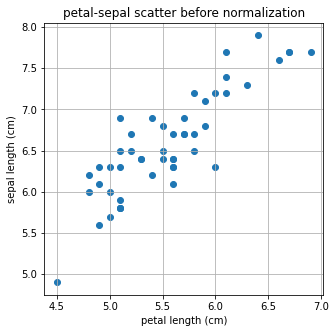

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

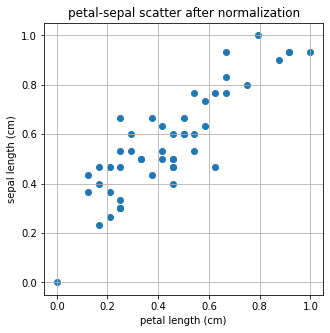

In [13]:
# from sklearn.preprocessing import minmax_scaler도 존재한다

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


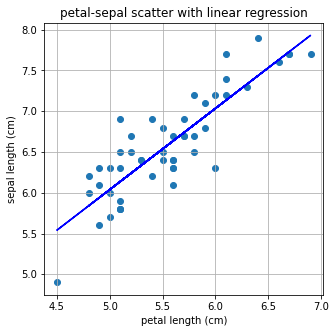

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### L1 regularization

기울기 : 0.00, 절편 : 6.59


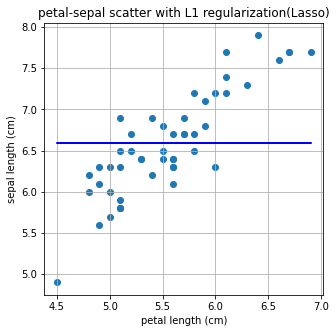

In [22]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso
L1 = Lasso()

L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### L2 regularization

기울기 : 0.93, 절편 : 1.41


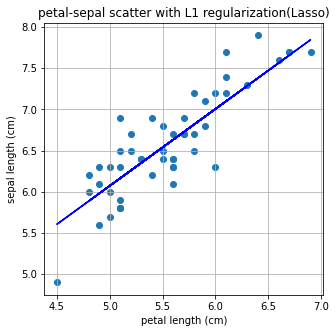

In [23]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge
L2 = Ridge()

L2.fit(X.reshape(-1,1), Y)
a, b=L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [24]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


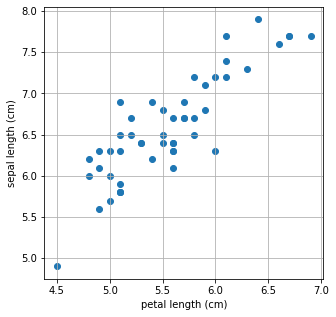

In [25]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


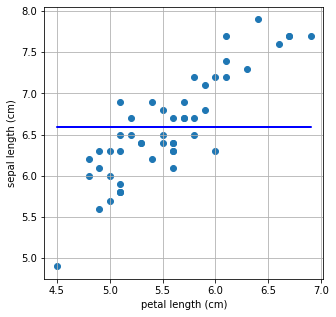

In [26]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

#### feature가 1개라서 그런가?....그럼 컬럼 수가 많은 데이터에서의 L1 regularization 비교

In [27]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [28]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [32]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

Result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [2]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [3]:
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)


print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


### Lp norm - Vector norm

In [28]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([1,10,1,1,1],dtype='object')
p = 20
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00000 
result of making norm : 10.00000 


In [5]:
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### Lp norm - Matrix norm

* p=1인 경우에는 컬럼(column)의 합이 가장 큰 값이 출력되고, 
* p=∞인 경우에는 로우(row)의 합이 가장 큰 값이 출력됩니다.

In [11]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)

result one norm of A : 14.0
result inf norm of A : 18.0



### Dropout

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [40]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

#### not overfitting인 경우, dropout 사용

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.3793 - accuracy: 0.4560
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1423 - accuracy: 0.5393
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0834 - accuracy: 0.5655
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0630 - accuracy: 0.5704
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0386 - accuracy: 0.5842


In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4913 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.8917


#### overfitting인 경우, dropout 사용

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 5s 36ms/step - loss: 2.0505 - accuracy: 0.5041 - val_loss: 1.6421 - val_accuracy: 0.6067
Epoch 2/200
117/117 [==============================] - 4s 32ms/step - loss: 1.4060 - accuracy: 0.6126 - val_loss: 1.1846 - val_accuracy: 0.6550
Epoch 3/200
117/117 [==============================] - 4s 31ms/step - loss: 1.0831 - accuracy: 0.6768 - val_loss: 0.9616 - val_accuracy: 0.7133
Epoch 4/200
117/117 [==============================] - 4s 32ms/step - loss: 0.9035 - accuracy: 0.7157 - val_loss: 0.8270 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 4s 31ms/step - loss: 0.7950 - accuracy: 0.7349 - val_loss: 0.7427 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 4s 31ms/step - loss: 0.7293 - accuracy: 0.7464 - val_loss: 0.6973 - val_accuracy: 0.7667
Epoch 7/200
117/117 [==============================] - 4s 31ms/step - loss: 0.6868 - accuracy: 0.7565 - val_loss: 0.6568 - val_accuracy:

117/117 [==============================] - 4s 31ms/step - loss: 0.3976 - accuracy: 0.8610 - val_loss: 0.4047 - val_accuracy: 0.8333
Epoch 58/200
117/117 [==============================] - 4s 30ms/step - loss: 0.3960 - accuracy: 0.8613 - val_loss: 0.4014 - val_accuracy: 0.8333
Epoch 59/200
117/117 [==============================] - 4s 30ms/step - loss: 0.3962 - accuracy: 0.8613 - val_loss: 0.4025 - val_accuracy: 0.8400
Epoch 60/200
117/117 [==============================] - 4s 32ms/step - loss: 0.3933 - accuracy: 0.8619 - val_loss: 0.4017 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 4s 30ms/step - loss: 0.3919 - accuracy: 0.8622 - val_loss: 0.4063 - val_accuracy: 0.8367
Epoch 62/200
117/117 [==============================] - 4s 32ms/step - loss: 0.3919 - accuracy: 0.8624 - val_loss: 0.3967 - val_accuracy: 0.8367
Epoch 63/200
117/117 [==============================] - 4s 31ms/step - loss: 0.3898 - accuracy: 0.8632 - val_loss: 0.3977 - val_accuracy: 0.840

117/117 [==============================] - 2s 15ms/step - loss: 0.3439 - accuracy: 0.8787 - val_loss: 0.3577 - val_accuracy: 0.8550
Epoch 114/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3414 - accuracy: 0.8795 - val_loss: 0.3555 - val_accuracy: 0.8467
Epoch 115/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3404 - accuracy: 0.8802 - val_loss: 0.3613 - val_accuracy: 0.8550
Epoch 116/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3394 - accuracy: 0.8804 - val_loss: 0.3570 - val_accuracy: 0.8483
Epoch 117/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3390 - accuracy: 0.8801 - val_loss: 0.3617 - val_accuracy: 0.8533
Epoch 118/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3393 - accuracy: 0.8797 - val_loss: 0.3579 - val_accuracy: 0.8500
Epoch 119/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3374 - accuracy: 0.8806 - val_loss: 0.3545 - val_accuracy:

117/117 [==============================] - 2s 15ms/step - loss: 0.3066 - accuracy: 0.8912 - val_loss: 0.3338 - val_accuracy: 0.8633
Epoch 170/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3059 - accuracy: 0.8912 - val_loss: 0.3449 - val_accuracy: 0.8650
Epoch 171/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3055 - accuracy: 0.8918 - val_loss: 0.3341 - val_accuracy: 0.8650
Epoch 172/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3047 - accuracy: 0.8916 - val_loss: 0.3350 - val_accuracy: 0.8733
Epoch 173/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3043 - accuracy: 0.8919 - val_loss: 0.3346 - val_accuracy: 0.8667
Epoch 174/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3038 - accuracy: 0.8918 - val_loss: 0.3365 - val_accuracy: 0.8750
Epoch 175/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3028 - accuracy: 0.8930 - val_loss: 0.3334 - val_accuracy:

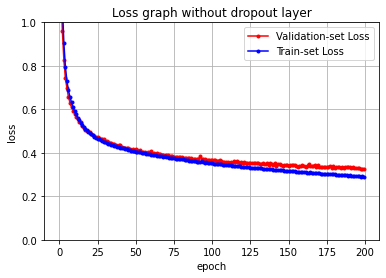

In [7]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

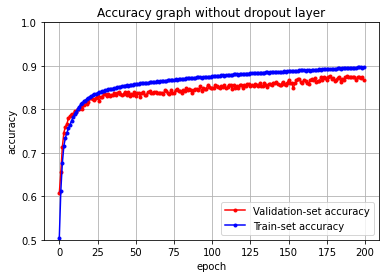

In [8]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* dropout layer추가

In [9]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 2s 18ms/step - loss: 2.0753 - accuracy: 0.4718 - val_loss: 1.6900 - val_accuracy: 0.6200
Epoch 2/200
117/117 [==============================] - 2s 17ms/step - loss: 1.4609 - accuracy: 0.5655 - val_loss: 1.2199 - val_accuracy: 0.6333
Epoch 3/200
117/117 [==============================] - 2s 17ms/step - loss: 1.1550 - accuracy: 0.6266 - val_loss: 1.0087 - val_accuracy: 0.6983
Epoch 4/200
117/117 [==============================] - 2s 17ms/step - loss: 0.9917 - accuracy: 0.6703 - val_loss: 0.8770 - val_accuracy: 0.7450
Epoch 5/200
117/117 [==============================] - 2s 17ms/step - loss: 0.8879 - accuracy: 0.6963 - val_loss: 0.7886 - val_accuracy: 0.7617
Epoch 6/200
117/117 [==============================] - 2s 17ms/step - loss: 0.8188 - accuracy: 0.7179 - val_loss: 0.7331 - val_accuracy: 0.7567
Epoch 7/200
117/117 [==============================] - 2s 17ms/step - loss: 0.7694 - accuracy: 0.7293 - val_loss: 0.6932 - val_accuracy:

117/117 [==============================] - 2s 17ms/step - loss: 0.4268 - accuracy: 0.8499 - val_loss: 0.4111 - val_accuracy: 0.8350
Epoch 58/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4234 - accuracy: 0.8500 - val_loss: 0.4056 - val_accuracy: 0.8400
Epoch 59/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4237 - accuracy: 0.8507 - val_loss: 0.4036 - val_accuracy: 0.8433
Epoch 60/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4213 - accuracy: 0.8510 - val_loss: 0.4019 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4215 - accuracy: 0.8512 - val_loss: 0.4009 - val_accuracy: 0.8400
Epoch 62/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4185 - accuracy: 0.8519 - val_loss: 0.4009 - val_accuracy: 0.8417
Epoch 63/200
117/117 [==============================] - 2s 17ms/step - loss: 0.4168 - accuracy: 0.8521 - val_loss: 0.3986 - val_accuracy: 0.840

117/117 [==============================] - 2s 17ms/step - loss: 0.3657 - accuracy: 0.8710 - val_loss: 0.3585 - val_accuracy: 0.8550
Epoch 114/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3631 - accuracy: 0.8727 - val_loss: 0.3545 - val_accuracy: 0.8517
Epoch 115/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3647 - accuracy: 0.8716 - val_loss: 0.3543 - val_accuracy: 0.8600
Epoch 116/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3621 - accuracy: 0.8723 - val_loss: 0.3538 - val_accuracy: 0.8500
Epoch 117/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3615 - accuracy: 0.8723 - val_loss: 0.3515 - val_accuracy: 0.8550
Epoch 118/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3596 - accuracy: 0.8733 - val_loss: 0.3535 - val_accuracy: 0.8567
Epoch 119/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3613 - accuracy: 0.8716 - val_loss: 0.3510 - val_accuracy:

117/117 [==============================] - 2s 17ms/step - loss: 0.3307 - accuracy: 0.8821 - val_loss: 0.3264 - val_accuracy: 0.8633
Epoch 170/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3290 - accuracy: 0.8840 - val_loss: 0.3273 - val_accuracy: 0.8650
Epoch 171/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3305 - accuracy: 0.8831 - val_loss: 0.3271 - val_accuracy: 0.8633
Epoch 172/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3311 - accuracy: 0.8825 - val_loss: 0.3255 - val_accuracy: 0.8617
Epoch 173/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3293 - accuracy: 0.8829 - val_loss: 0.3304 - val_accuracy: 0.8650
Epoch 174/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3307 - accuracy: 0.8817 - val_loss: 0.3259 - val_accuracy: 0.8650
Epoch 175/200
117/117 [==============================] - 2s 17ms/step - loss: 0.3303 - accuracy: 0.8823 - val_loss: 0.3263 - val_accuracy:

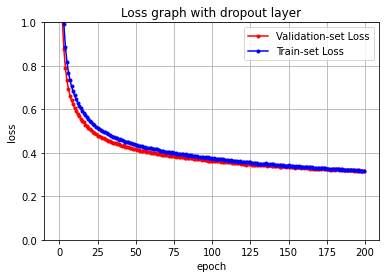

In [10]:
# Q. loss 값의 그래프를 그려봅시다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

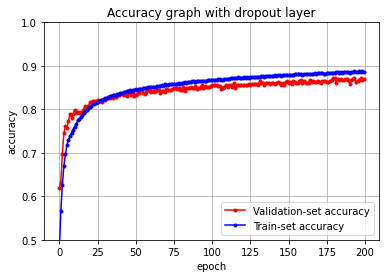

In [11]:
# Q. accuracy 값의 그래프를 그려봅시다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Batch Normalization

* batch normalization 기법은 각 mini-batch마다 평균과 분산을 계산하여 정규화(normalization)를 수행하고, scale and shift 변환을 적용하여 mini-batch들이 비슷한 데이터 분포를 가지도록 합니다.

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 48ms/step - loss: 1.2542 - accuracy: 0.6124 - val_loss: 0.7564 - val_accuracy: 0.7428
Epoch 2/20
21/21 [==============================] - 1s 38ms/step - loss: 0.6646 - accuracy: 0.7721 - val_loss: 0.6044 - val_accuracy: 0.7975
Epoch 3/20
21/21 [==============================] - 1s 40ms/step - loss: 0.5650 - accuracy: 0.8106 - val_loss: 0.5427 - val_accuracy: 0.8184
Epoch 4/20
21/21 [==============================] - 1s 39ms/step - loss: 0.5167 - accuracy: 0.8269 - val_loss: 0.5103 - val_accuracy: 0.8288
Epoch 5/20
21/21 [==============================] - 1s 39ms/step - loss: 0.4852 - accuracy: 0.8358 - val_loss: 0.4830 - val_accuracy: 0.8379
Epoch 6/20
21/21 [==============================] - 1s 39ms/step - loss: 0.4634 - accuracy: 0.8419 - val_loss: 0.4652 - val_accuracy: 0.8428
Epoch 7/20
21/21 [==============================] - 1s 37ms/step - loss: 0.4428 - accuracy: 0.8481 - val_loss: 0.4478 - val_accuracy: 0.8490
Epoch 8/20
21

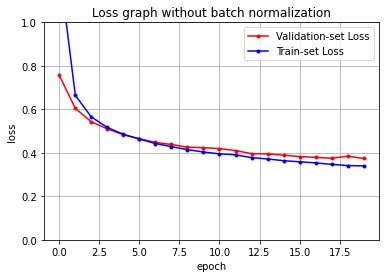

In [14]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

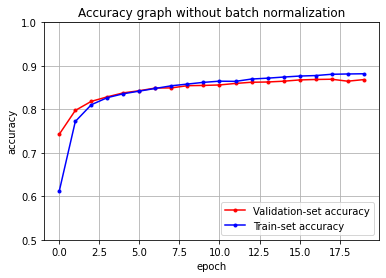

In [15]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* batch normalization 추가

In [16]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 2s 56ms/step - loss: 0.9292 - accuracy: 0.6869 - val_loss: 1.0222 - val_accuracy: 0.6929
Epoch 2/20
21/21 [==============================] - 1s 44ms/step - loss: 0.5133 - accuracy: 0.8266 - val_loss: 0.8343 - val_accuracy: 0.7626
Epoch 3/20
21/21 [==============================] - 1s 44ms/step - loss: 0.4496 - accuracy: 0.8462 - val_loss: 0.7442 - val_accuracy: 0.7991
Epoch 4/20
21/21 [==============================] - 1s 45ms/step - loss: 0.4126 - accuracy: 0.8591 - val_loss: 0.6691 - val_accuracy: 0.8263
Epoch 5/20
21/21 [==============================] - 1s 43ms/step - loss: 0.3863 - accuracy: 0.8670 - val_loss: 0.6341 - val_accuracy: 0.8206
Epoch 6/20
21/21 [==============================] - 1s 47ms/step - loss: 0.3667 - accuracy: 0.8745 - val_loss: 0.5798 - val_accuracy: 0.8427
Epoch 7/20
21/21 [==============================] - 1s 46ms/step - loss: 0.3503 - accuracy: 0.8784 - val_loss: 0.5384 - val_accuracy: 0.8502
Epoch 8/20
21

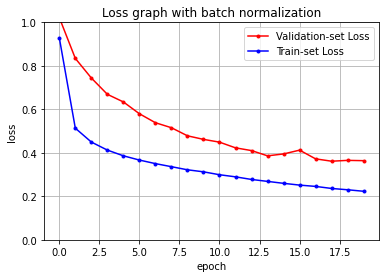

In [18]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

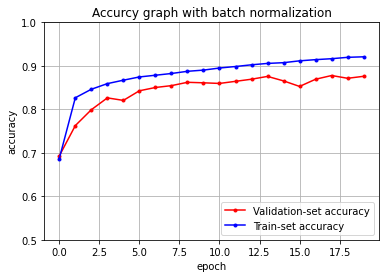

In [19]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()